# Semantics and Word Vectors
Sometimes called "opinion mining", [Wikipedia](https://en.wikipedia.org/wiki/Sentiment_analysis) defines ***sentiment analysis*** as
<div class="alert alert-info" style="margin: 20px">"the use of natural language processing ... to systematically identify, extract, quantify, and study affective states and subjective information.<br>
Generally speaking, sentiment analysis aims to determine the attitude of a speaker, writer, or other subject with respect to some topic or the overall contextual polarity or emotional reaction to a document, interaction, or event."</div>

Up to now we've used the occurrence of specific words and word patterns to perform test classifications. In this section we'll take machine learning even further, and try to extract intended meanings from complex phrases. Some simple examples include:
* Python is relatively easy to learn.
* That was the worst movie I've ever seen.

However, things get harder with phrases like:
* I do not dislike green eggs and ham. (requires negation handling)

The way this is done is through complex machine learning algorithms like [word2vec](https://en.wikipedia.org/wiki/Word2vec). The idea is to create numerical arrays, or *word embeddings* for every word in a large corpus. Each word is assigned its own vector in such a way that words that frequently appear together in the same context are given vectors that are close together. The result is a model that may not know that a "lion" is an animal, but does know that "lion" is closer in context to "cat" than "dandelion".

It is important to note that *building* useful models takes a long time - hours or days to train a large corpus - and that for our purposes it is best to import an existing model rather than take the time to train our own.


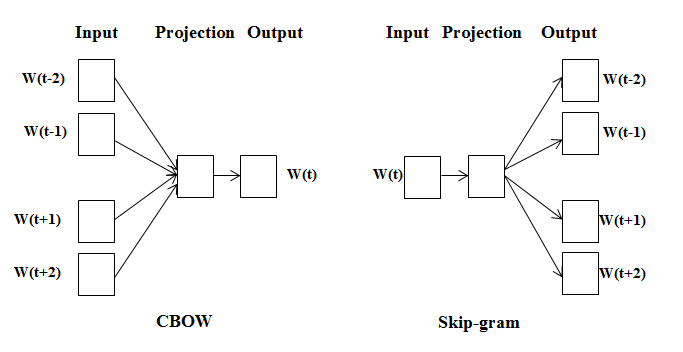


Word embeddings are the results of learning from deep learning algorithms, which can learn characters from data through feature extraction. One implementation of word embedding is word2vec.

Word2vec has two models, namely

Continuous Bag of Word (CBOW) and
Skip Gram Model.
Both of these methods use the concept of a neural network that maps words to target variables, which are also words. In these techniques, "weights" are used as word vector representations. CBOW tries to predict a word on the basis of its neighbors, while Skip Gram tries to predict the neighbors of a word.

In simpler words, CBOW tends to find the probability of a word occurring in a context. So, it generalizes over all the different contexts in which a word can be used. Whereas SkipGram tends to study different contexts separately. Skip Gram needs more data to be trained contains more knowledge about the context.


___
# Installing Larger spaCy Models
Up to now we've been using spaCy's smallest English language model, [**en_core_web_sm**](https://spacy.io/models/en#en_core_web_sm) (35MB), which provides vocabulary, syntax, and entities, but not vectors. To take advantage of built-in word vectors we'll need a larger library. We have a few options:
> [**en_core_web_md**](https://spacy.io/models/en#en_core_web_md) (116MB) Vectors: 685k keys, 20k unique vectors (300 dimensions)
> <br>or<br>
> [**en_core_web_lg**](https://spacy.io/models/en#en_core_web_lg) (812MB) Vectors: 685k keys, 685k unique vectors (300 dimensions)

If you plan to rely heavily on word vectors, consider using spaCy's largest vector library containing over one million unique vectors:
> [**en_vectors_web_lg**](https://spacy.io/models/en#en_vectors_web_lg) (631MB) Vectors: 1.1m keys, 1.1m unique vectors (300 dimensions)

For our purposes **en_core_web_md** should suffice.

### From the command line (you must run this as admin or use sudo):

> `activate spacyenv`&emsp;*if using a virtual environment*   
> 
> `python -m spacy download en_core_web_md`  
> `python -m spacy download en_core_web_lg`&emsp;&emsp;&ensp;*optional library*  
> `python -m spacy download en_vectors_web_lg`&emsp;*optional library*  

> ### If successful, you should see a message like: 
> <tt><br>
> **Linking successful**<br>
> C:\Anaconda3\envs\spacyenv\lib\site-packages\en_core_web_md --><br>
> C:\Anaconda3\envs\spacyenv\lib\site-packages\spacy\data\en_core_web_md<br>
> <br>
> You can now load the model via spacy.load('en_core_web_md')</tt>

<font color=green>Of course, we have a third option, and that is to train our own vectors from a large corpus of documents. Unfortunately this would take a prohibitively large amount of time and processing power.</font> 

___
# Word Vectors
Word vectors - also called *word embeddings* - are mathematical descriptions of individual words such that words that appear frequently together in the language will have similar values. In this way we can mathematically derive *context*. As mentioned above, the word vector for "lion" will be closer in value to "cat" than to "dandelion".

## Vector values
So what does a word vector look like? Since spaCy employs 300 dimensions, word vectors are stored as 300-item arrays.

Note that we would see the same set of values with **en_core_web_md** and **en_core_web_lg**, as both were trained using the [word2vec](https://en.wikipedia.org/wiki/Word2vec) family of algorithms.

In [3]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
# Import spaCy and load the language library
#import spacy
#nlp = spacy.load('en_core_web_md')  # make sure to use a larger model!

In [4]:
nlp(u'lion').vector

array([  1.2746  ,   0.46242 ,  -1.1829  ,  -5.2661  ,  -2.7128  ,
         1.8521  ,  -0.94273 ,   2.1865  ,   6.503   ,   0.6704  ,
         1.5361  ,   2.5992  ,  -0.36233 ,   4.3965  ,  -6.5644  ,
         1.6141  ,  -1.2897  ,   2.1184  ,  -0.63654 ,  -3.4572  ,
        -4.3771  ,   4.2074  ,  -3.6411  ,  -0.97214 ,   1.3253  ,
        -2.3125  ,  -3.6531  ,  -2.8398  ,   2.7913  ,  -1.53    ,
        -2.9984  ,  -2.6357  ,   0.50615 ,  -2.6925  ,   4.3401  ,
        -5.6017  ,   0.045691,   4.3832  ,  -0.19535 ,  -1.0751  ,
         0.32172 ,   2.4395  ,   4.6638  ,   3.4471  ,  -3.3847  ,
        -1.8238  ,   0.70212 ,   0.58557 ,   5.0032  ,  -3.1072  ,
         1.2364  ,   7.4595  ,   0.057368,   1.0111  ,  -1.0827  ,
         0.69113 ,   2.8009  ,  -3.4383  ,  -1.0599  ,  -2.2627  ,
        -5.149   ,  -5.0636  ,   3.1405  ,   1.0793  ,  -0.72892 ,
        -3.9939  ,  -0.69551 ,  -0.55767 ,   3.2555  ,  -2.9449  ,
         4.7114  ,   1.6388  ,   1.3828  ,   1.4255  ,  -3.233

What's interesting is that Doc and Span objects themselves have vectors, derived from the averages of individual token vectors. <br>This makes it possible to compare similarities between whole documents.

In [5]:
doc = nlp(u'The quick brown fox jumped over the lazy dogs.')

doc.vector

array([-1.7769655 ,  0.39714497, -1.695121  , -0.1089559 ,  3.861494  ,
       -0.10778303, -0.02750097,  3.191314  ,  1.0857747 , -0.2615487 ,
        4.0720797 ,  1.5932049 , -2.7569218 ,  0.70982707,  2.0976841 ,
        0.08150103,  0.8847861 , -0.505237  ,  0.767067  , -2.88911   ,
       -0.28514975, -0.331664  ,  0.306348  , -2.25347   ,  0.96798134,
       -0.030282  , -3.765162  , -2.168157  ,  1.3985709 ,  2.175709  ,
       -0.81103534, -0.55156004, -1.033463  , -2.3130198 , -2.892054  ,
       -2.843568  , -0.33247897,  1.620013  ,  3.03307   , -0.42730814,
        1.298548  ,  0.18969259,  1.234282  , -0.14263602, -1.427765  ,
       -0.05807757,  0.33836406, -1.6987331 , -2.13661   ,  0.10412004,
        0.62479395,  3.9712129 , -0.31110606, -1.9676571 , -0.11860895,
        0.55582994, -0.660888  ,  1.947435  ,  1.6391805 ,  0.6569032 ,
        0.054408  , -2.08993   ,  1.0370519 ,  0.5363236 ,  0.00807395,
       -0.91060096, -3.3870788 , -1.4823462 ,  1.4170542 ,  0.32

## Identifying similar vectors
The best way to expose vector relationships is through the `.similarity()` method of Doc tokens.

In [6]:
# Create a three-token Doc object:
tokens = nlp(u'lion cat pet')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

lion lion 1.0
lion cat 0.3854507803916931
lion pet 0.20031584799289703
cat lion 0.3854507803916931
cat cat 1.0
cat pet 0.732966423034668
pet lion 0.20031584799289703
pet cat 0.732966423034668
pet pet 1.0


<font color=green>Note that order doesn't matter. `token1.similarity(token2)` has the same value as `token2.similarity(token1)`.</font>
#### To view this as a table:

In [7]:
# For brevity, assign each token a name
a,b,c = tokens

# Display as a Markdown table (this only works in Jupyter!)
from IPython.display import Markdown, display
display(Markdown(f'<table><tr><th></th><th>{a.text}</th><th>{b.text}</th><th>{c.text}</th></tr>\
<tr><td>**{a.text}**</td><td>{a.similarity(a):{.4}}</td><td>{b.similarity(a):{.4}}</td><td>{c.similarity(a):{.4}}</td></tr>\
<tr><td>**{b.text}**</td><td>{a.similarity(b):{.4}}</td><td>{b.similarity(b):{.4}}</td><td>{c.similarity(b):{.4}}</td></tr>\
<tr><td>**{c.text}**</td><td>{a.similarity(c):{.4}}</td><td>{b.similarity(c):{.4}}</td><td>{c.similarity(c):{.4}}</td></tr>'))

<table><tr><th></th><th>lion</th><th>cat</th><th>pet</th></tr><tr><td>**lion**</td><td>1.0</td><td>0.3855</td><td>0.2003</td></tr><tr><td>**cat**</td><td>0.3855</td><td>1.0</td><td>0.733</td></tr><tr><td>**pet**</td><td>0.2003</td><td>0.733</td><td>1.0</td></tr>

As expected, we see the strongest similarity between "cat" and "pet", the weakest between "lion" and "pet", and some similarity between "lion" and "cat". A word will have a perfect (1.0) similarity with itself.

If you're curious, the similarity between "lion" and "dandelion" is very small:

In [8]:
nlp(u'lion').similarity(nlp(u'dandelion'))

0.4145525455932417

### Opposites are not necessarily different
Words that have opposite meaning, but that often appear in the same *context* may have similar vectors.

In [9]:
# Create a three-token Doc object:
tokens = nlp(u'like love hate')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

like like 1.0
like love 0.5212638974189758
like hate 0.5065140724182129
love like 0.5212638974189758
love love 1.0
love hate 0.5708349943161011
hate like 0.5065140724182129
hate love 0.5708349943161011
hate hate 1.0


## Vector norms
It's sometimes helpful to aggregate 300 dimensions into a [Euclidian (L2) norm](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#Euclidean_norm), computed as the square root of the sum-of-squared-vectors. This is accessible as the `.vector_norm` token attribute. Other helpful attributes include `.has_vector` and `.is_oov` or *out of vocabulary*.

For example, our 685k vector library may not have the word "[nargle](https://en.wikibooks.org/wiki/Muggles%27_Guide_to_Harry_Potter/Magic/Nargle)". To test this:

In [10]:
tokens = nlp(u'dog cat nargle')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 75.254234 False
cat True 63.188496 False
nargle False 0.0 True


Indeed we see that "nargle" does not have a vector, so the vector_norm value is zero, and it identifies as *out of vocabulary*.

## Vector arithmetic
Believe it or not, we can actually calculate new vectors by adding & subtracting related vectors. A famous example suggests
<pre>"king" - "man" + "woman" = "queen"</pre>
Let's try it out!

In [11]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

# Now we find the closest vector in the vocabulary to the result of "man" - "woman" + "queen"
new_vector = king - man + woman
computed_similarities = []

for word in nlp.vocab:
    # Ignore words without vectors and mixed-case words:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])

print([w[0].text for w in computed_similarities[:10]])

['king', 'the', 'and', 'that', 'where', 'she', 'they', 'woman', 'there', 'should']


So in this case, "king" was still closer than "queen" to our calculated vector, although "queen" did show up!